In [2]:
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,Input,ReLU
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img

from keras.optimizers import Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (c:\Users\yasar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py)

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = (x_train.astype(np.float32)-127.5)/127.5
# print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2])
# print(x_train.shape)


In [4]:
# crate generator
def creatre_generator():
    generator = Sequential()
    generator.add(Dense(units=512,input_dim = 100))
    generator.add(ReLU())

    generator.add(Dense(units=512))
    generator.add(ReLU())

   
    generator.add(Dense(units=1024))
    generator.add(ReLU())

    generator.add(Dense(units=784,activation ="tanh"))

    generator.compile(loss="binary_crossentropy",optimizer="adam")
    
    return generator



g = creatre_generator()
g.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_2 (ReLU)              (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

In [5]:
# create discriminate
def creatre_discriminater():
    discriminater = Sequential()
    discriminater.add(Dense(units=1024,input_dim = 784))
    discriminater.add(ReLU())
    discriminater.add(Dropout(0.4))

    discriminater.add(Dense(units=512))
    discriminater.add(ReLU())
    discriminater.add(Dropout(0.4))

    discriminater.add(Dense(units=256))
    discriminater.add(ReLU())
    discriminater.add(Dropout(0.4))

    discriminater.add(Dense(units=1,activation="sigmoid"))

    discriminater.compile(loss="binary_crossentropy",optimizer="adam")

    return discriminater
d = creatre_discriminater()
# d.summary()

In [6]:
def create_gan(discriminater,generator):
    discriminater.trainable =False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminater(x)
    gan = Model(inputs= gan_input,outputs = gan_output)
    gan.compile(loss="binary_crossentropy", optimizer="adam")
    return gan

gan = create_gan(d,g)
# gan.summary()

In [7]:
epochs = 50
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0,1,[batch_size,100])
        generated_images =g.predict(noise)

        image_batch = x_train[np.random.randint(low=0,high=x_train.shape[0],size=batch_size)]
        x = np.concatenate([image_batch,generated_images])
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
        d.trainable =True
        d.train_on_batch(x,y_dis)


        noise = np.random.normal(0,1,[batch_size,100])

        y_gen = np.ones(batch_size)
        d.trainable  =False
        gan.train_on_batch(noise,y_gen)
    print ("epoch",e)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


In [8]:
g.save_weights("gans_model.h5")

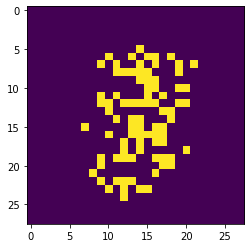

In [15]:
noise = np.random.normal(loc=0,scale=1,size=[100,100])
generated_images =g.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[99],interpolation="nearest")
plt.show()